**Exercice 3   — MNIST Multi-classes classification with Decision Tree**

1.  Charger les données du MNIST.

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]


/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


2.  Afficher les informations concernant les données.

In [2]:
print("Les données MNIST ont pour dimensions : ", mnist.data.shape)
print("Les étiquettes ont pour dimensions : ", mnist.target.shape)


Les données MNIST ont pour dimensions :  (70000, 784)
Les étiquettes ont pour dimensions :  (70000,)


3.  Proposer deux modèles basés sur les arbres de décisions

modèle basé sur le classificateur CART

In [3]:
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier(max_depth=15)


modèle basé sur le classificateur C4.5

In [4]:
from sklearn.tree import DecisionTreeClassifier
c45 = DecisionTreeClassifier(max_depth=15, criterion='entropy')


4.  Comparer ces deux modèles avec la régression logistique

In [5]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Diviser les données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2, random_state=42)

# Entraîner les trois modèles
cart.fit(X_train, y_train)
c45.fit(X_train, y_train)
logreg.fit(X_train, y_train)

# Faire des prédictions sur les données de test
cart_preds = cart.predict(X_test)
c45_preds = c45.predict(X_test)
logreg_preds = logreg.predict(X_test)

# Calculer la précision des trois modèles
cart_acc = accuracy_score(y_test, cart_preds)
c45_acc = accuracy_score(y_test, c45_preds)
logreg_acc = accuracy_score(y_test, logreg_preds)

print("Précision du modèle CART : {:.2f}%".format(cart_acc*100))
print("Précision du modèle C4.5 : {:.2f}%".format(c45_acc*100))
print("Précision de la régression logistique : {:.2f}%".format(logreg_acc*100))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Précision du modèle CART : 87.56%
Précision du modèle C4.5 : 88.14%
Précision de la régression logistique : 91.65%


5.  Visualiser les résultats comparatifs graphiquement. 

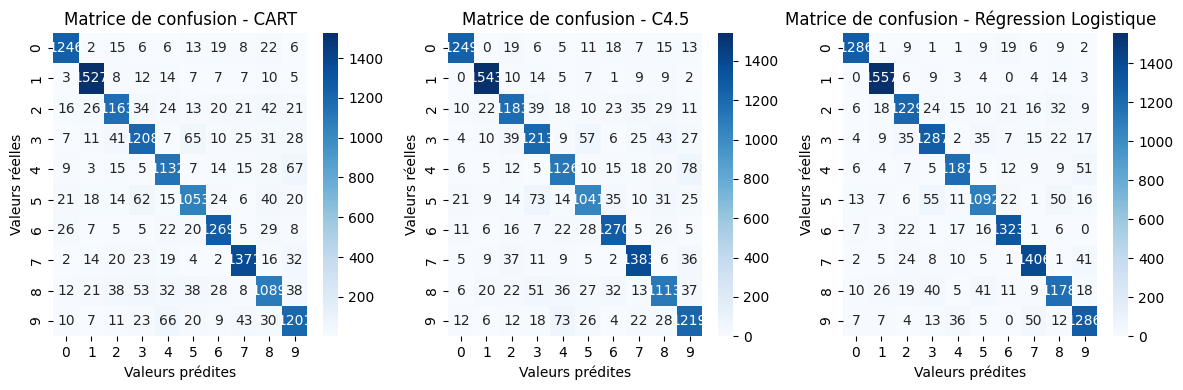

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une matrice de confusion pour chaque modèle
cart_cm = confusion_matrix(y_test, cart_preds)
c45_cm = confusion_matrix(y_test, c45_preds)
logreg_cm = confusion_matrix(y_test, logreg_preds)

# Afficher les matrices de confusion
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.heatmap(cart_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de confusion - CART')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')

plt.subplot(132)
sns.heatmap(c45_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de confusion - C4.5')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')

plt.subplot(133)
sns.heatmap(logreg_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matrice de confusion - Régression Logistique')
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')

plt.tight_layout()
plt.show()


6.  Conclusion

. la régression logistique est capable de mieux modéliser la relation entre les caractéristiques d'entrée et les étiquettes de sortie pour la tâche de classification de chiffres de la base de données MNIST.

Cependant, il est important de noter que les modèles d'arbres de décision sont également efficaces pour cette tâche et peuvent être une option viable si la performance de la régression logistique ne répond pas aux exigences de précision ou si la complexité du modèle doit être réduite pour éviter l'overfitting.